# <font color='289C4E'>Part B: Clustering<font><a class='anchor' id='top'></a>

### <font color='289C4E'>B1.1<font><a class='anchor' id='top'></a>

dataset used:
https://www.kaggle.com/datasets/heitornunes/aircraft-performance-dataset-aircraft-bluebook/data?select=Helicopter_BlueBook.csv

In [1]:
import pandas as pd

In [2]:
# Reading file data and seeing format of data using head
dataset_heli = pd.read_csv('Helicopter_BlueBook.csv')
dataset_heli.head()

,Helicopter Description,Company,Max speed. Knots. S.L.,Cruise. Knots. S.L.,VNE. Knots @ gross,ROC fpm. @ gross S.L.,Range. std tanks. S.L.N.M.,Crusie time (hrs/min),Fuel Avg. gph @ cruise,Fuel std. usable gal.,...,Service ceiling all eng's max gross std day,HIGE max grpss std day,HOGE max gross std day,M/R blades dia. (ft/in),Number of Blades,Blade Material,Rotot Type,Storage Width (ft/in),Length (ft/in),Height (ft/in)
0,A109,Agusta Aerospace Corporation,150.0,129.0,167.0,2.0,251.0,2/15,56,145,...,15.0,10.0,7.0,36/1,4.0,metal,F/Artic,9/6,43/7,10/9
1,A109A,Agusta Aerospace Corporation,152.0,143.0,161.0,1.0,297.0,3/7,62,146,...,15.0,8.0,5.0,36/1,4.0,metal,F/Artic,9/6,43/7,10/9
2,A109A II,Agusta Aerospace Corporation,NaN,147.0,168.0,2.0,333.0,2/57,62,146,...,15.0,8.0,5.0,36/1,4.0,metal,F/Artic,9/5,42/10,10/10
3,A109-MKII Plus,Agusta Aerospace Corporation,NaN,152.0,168.0,2.0,440.0,4/35,NaN,145,...,15.0,12.0,9.0,36/1,4.0,metal,F/Artic,NaN,NaN,NaN
4,430,"Bell Helicopter, A Textron Company",150.0,139.0,150.0,2.0,383.0,NaN,80,247,...,18.0,11.0,9.0,42/0,4.0,comp,NaN,11/3,44/1,11/2


### <font color='289C4E'>B1.2<font><a class='anchor' id='top'></a>

To wrangle this data we first try to remove all the NaN values, which are Not a Number, this is done by using the dropna method, which removes null values. Then we plot the data to see how it looks and there is an extreme outlier, so I use a filter to remove that extreme value. It is then plotted again to see all the datapoints.

In [3]:
# Taking features that will be analysed into a new dataframe and seeing format
dataset_heli_new = dataset_heli[[ 'Cruise. Knots. S.L.', 'Range. std tanks. S.L.N.M.']]
dataset_heli_new.sample(10)
# We can see the empty values in some entries

,Cruise. Knots. S.L.,Range. std tanks. S.L.N.M.
5,122.0,194.0
78,NaN,NaN
71,109.0,340.0
0,129.0,251.0
53,125.0,292.0
41,88.0,241.0
67,103.0,395.0
76,105.0,344.0
82,130.0,213.0
55,131.0,314.0


In [4]:
# Seeing how many entries there are
dataset_heli_new.shape

(102, 2)

In [5]:
# Removing null values from dataset and seeing new number of entries, which has decreased
dataset_heli_new2 = dataset_heli_new.dropna()
dataset_heli_new2.shape

(92, 2)

Text(0, 0.5, 'Range. std tanks. S.L.N.M.')

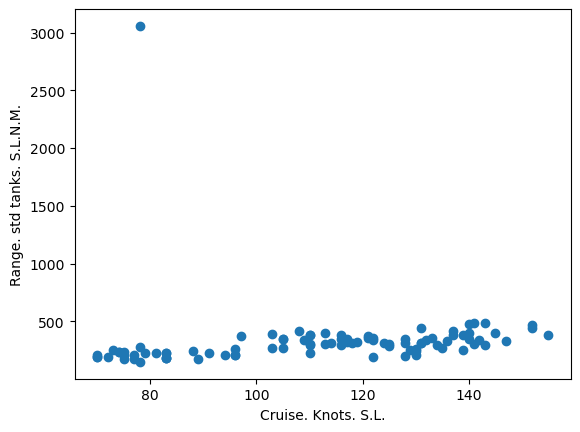

In [6]:
# Plotting scatterplot with cruise speed as x axis and range of helicopter as y axis
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=dataset_heli_new2['Cruise. Knots. S.L.'],y=dataset_heli_new2['Range. std tanks. S.L.N.M.'])
plt.xlabel('Cruise. Knots. S.L.')
plt.ylabel('Range. std tanks. S.L.N.M.')

In [7]:
# Removing extreme outlier by filtering out the extreme value
dataset_heli_new3 = dataset_heli_new2[dataset_heli_new2['Range. std tanks. S.L.N.M.']<600]

Text(0, 0.5, 'Range. std tanks. S.L.N.M.')

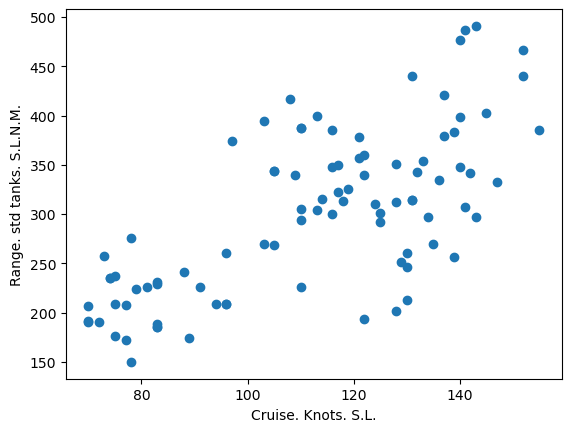

In [8]:
# Plotting scatterplot with cruise speed as x axis and range of helicopter as y axis of clean data
%matplotlib inline
plt.scatter(x=dataset_heli_new3['Cruise. Knots. S.L.'],y=dataset_heli_new3['Range. std tanks. S.L.N.M.'])
plt.xlabel('Cruise. Knots. S.L.')
plt.ylabel('Range. std tanks. S.L.N.M.')

### <font color='289C4E'>B1.3<font><a class='anchor' id='top'></a>

In [9]:
# Import statement for KMeans clustering
from sklearn.cluster import KMeans
# Performing KMeans clustering with 2 clusters, fitting the cruise speed and range of helicopter
kmeans = KMeans(n_clusters=2).fit(
    dataset_heli_new3[['Cruise. Knots. S.L.','Range. std tanks. S.L.N.M.']]
)

C:\Users\Brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
# Finding the coordinates of the cluster centers
kmeans.cluster_centers_

array([[ 92.92307692, 220.28205128],
       [126.23076923, 359.75      ]])

In [11]:
# Labels for the cluster are either one or the other, since there are only 2 clusters
kmeans.labels_

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1])

### <font color='289C4E'>B1.4<font><a class='anchor' id='top'></a>

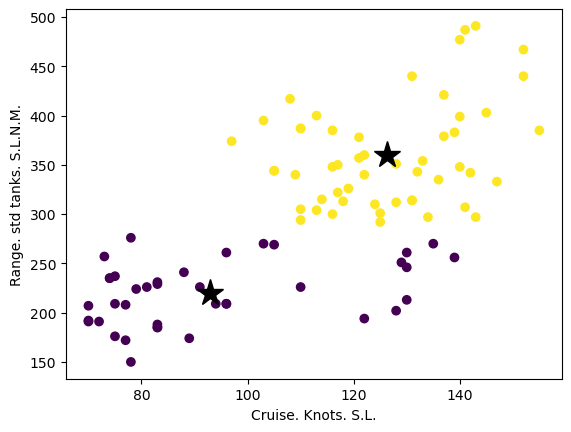

In [12]:
# Plotting the output labels
plt.scatter(
    x=dataset_heli_new3['Cruise. Knots. S.L.'],
    y=dataset_heli_new3['Range. std tanks. S.L.N.M.'], 
    c=kmeans.labels_)

# Plotting the cluster centers which are the black stars
plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)

# Plotting the x and y labels
plt.xlabel('Cruise. Knots. S.L.')
plt.ylabel('Range. std tanks. S.L.N.M.')
plt.show()

In [13]:
# Trying new clustering with 3 clusters instead of 2
kmeans2 = KMeans(n_clusters=3).fit(
    dataset_heli_new3[['Cruise. Knots. S.L.','Range. std tanks. S.L.N.M.']]
)

C:\Users\Brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Brian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


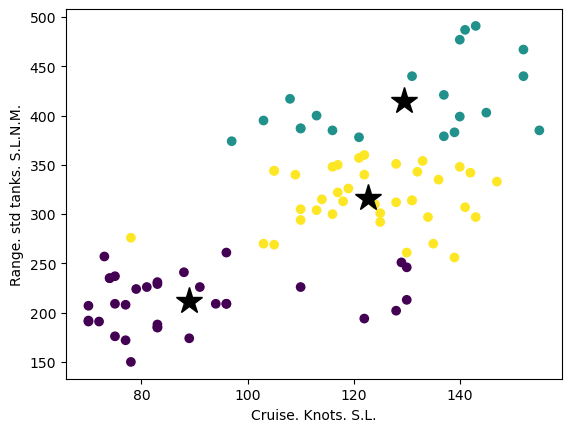

In [14]:
# Plotting the output labels
plt.scatter(
    x=dataset_heli_new3['Cruise. Knots. S.L.'],
    y=dataset_heli_new3['Range. std tanks. S.L.N.M.'], 
    c=kmeans2.labels_
)

# Plotting the cluster centers which are the black stars
plt.plot(
    kmeans2.cluster_centers_[:,0],
    kmeans2.cluster_centers_[:,1],
    'k*',
    markersize=20
)

# Plotting the x and y labels
plt.xlabel('Cruise. Knots. S.L.')
plt.ylabel('Range. std tanks. S.L.N.M.')
plt.show()

For this data I have attempted to try 2 and 3 clusters. For this dataset 2 clusters seems to be more relevent as the two clusters can be referred to as either relatively low end helicopters or high end helicopters. This is because the cluster to the left contains all the helicopters that have low range and low cruise speed while on the contrary, the other cluster contains the helicopters with high range and high cruise speed. 

As for why I believe 3 clusters is not suitable, it is because it is difficult to distinguish between the two clusters that are higher up, since a premium helicopter could fall into either of those clusters. While in the two cluster diagram there are some abnormalities in the lower cluster, they could be racing helicopters designed for higher speed movement and not for long range travels. There are also certainly mid range helicopters in this data which either get classified as low end or premium since there is no clear cluster for the mid range.